In [9]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})
from math import sqrt
from sympy.ntheory import isprime, quadratic_residues
import cv2 as cv
from PIL import Image
#!pip3 install git+https://github.com/pvigier/perlin-numpy
from perlin_numpy import generate_perlin_noise_2d
#from tqdm import tqdm

## Perlin Noise

In [2]:
dim, res = (256, 256), (8, 8)

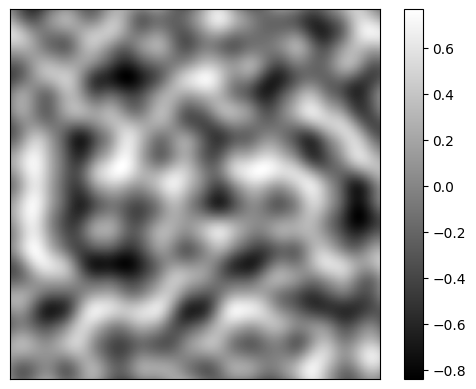

In [3]:
noise = generate_perlin_noise_2d(dim, res)
plt.imshow(noise, cmap='gray')#, interpolation='lanczos')
plt.colorbar()
plt.xticks([])
plt.yticks([])
plt.savefig('perlin_noise.png', bbox_inches='tight')
np.save("perlin_noise.npy", noise)

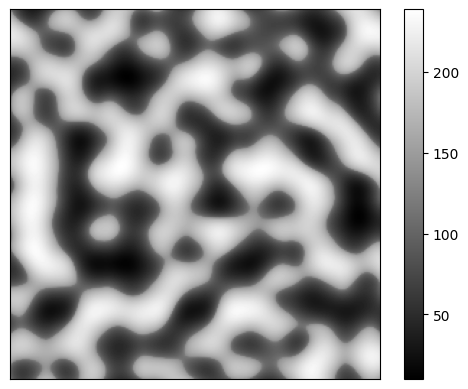

In [5]:
sqrt_noise = abs(noise) ** 0.5 * np.sign(noise)
noise_as_img = np.interp(noise, (-1,1), (0,255)).astype(np.uint8)
sqrt_noise_as_img = np.interp(sqrt_noise, (-1,1), (0,255)).astype(np.uint8)
plt.imshow(sqrt_noise_as_img, cmap='gray')
plt.colorbar()
plt.xticks([])
_ = plt.yticks([])

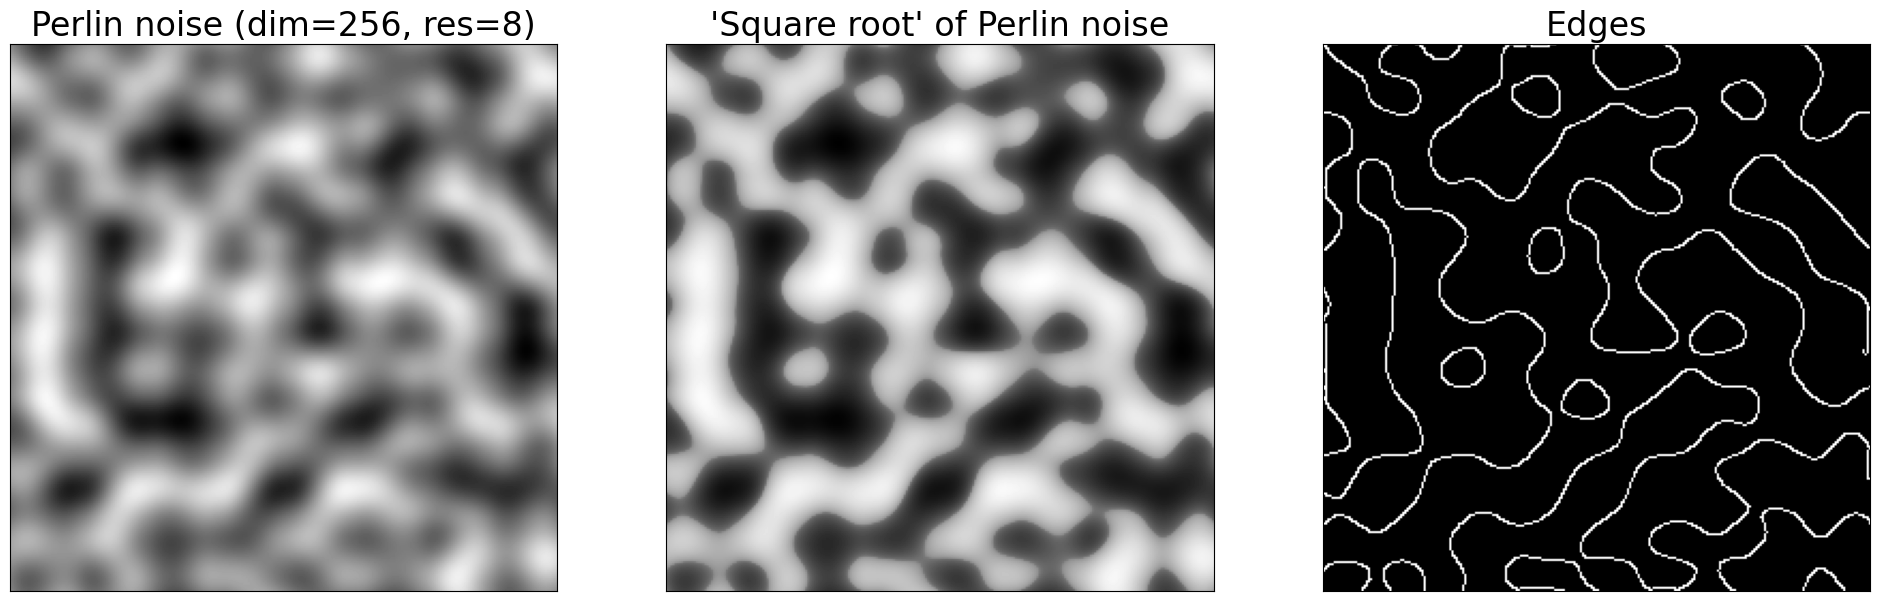

In [16]:
edges = cv.Canny(sqrt_noise_as_img,0,255)
np.save('edges.npy', edges)

plt.figure(figsize=(24,10))
plt.subplot(131),plt.imshow(noise_as_img, cmap = 'gray')
plt.title(f'Perlin noise (dim={dim[0]}, res={res[0]})'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(sqrt_noise_as_img, cmap = 'gray')
plt.title("'Square root' of Perlin noise"), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(edges, cmap = 'gray')
plt.title('Edges'), plt.xticks([]), plt.yticks([])
plt.savefig('edge_detection.png', bbox_inches='tight')
plt.show()